## Phase-space decomposition via a machine-learned cubical complex 

First we import the functions that will be used.

In [1]:
from src.attractor_id.jupyter_functions import train_classifier, compute_homology, make_decomposition_plot

### Code parameters

These are the parameters that can be changed before running the computation. The parameters set here override any parameters that are set in the configuration files.

The following systems are implemented:
- 'straight_separatrix'
- 'radial_2labels'
- 'radial_3labels'
- 'curved_separatrix'
- 'EMT'
- 'periodic'
- 'ellipsoidal_2d'
- 'DSGRN_2d_network'

In [2]:
system_name = 'DSGRN_2d_network'

N = 10 # number of nodes in the hidden layer of the network (must be an integer multiple of the dimension of the system)

labeling_threshold = 0.3 # list of thresholds in (0, 1/2) used to label cubes

epochs = 50 # number of times that the data is cycled through during neural network training

### Train neural network

We obtained a trained model, which is a cubical neural network with a hidden layer of width ```N```.

In [3]:
model_filename = 'model'
model = train_classifier(system_name, N, epochs, model_filename)

Epoch 1/2
Test loss: 0.517674
Train loss: 0.481779
Epoch 2/2
Test loss: 0.443255
Train loss: 0.416710


### Compute homology of labeled regions of the phase space decomposition obtained from the neural network

We compute the homology of each of the labeled regions according to the decomposition determined by the trained model. The output is the Betti numbers.

If the region is empty, this is specified.

We also compute the number of labeled cubes.

In [4]:
hyperplane_list = compute_homology(system_name, labeling_threshold, N, model)

Betti numbers of label 0 region: [1, 0, 0]
Betti numbers of label 1 region: [1, 0, 0]
Label 2 region is empty.
Betti numbers of uncertain region: [1, 1, 0]
Number of cubes labeled:  63


### Produce figure of phase space decomposition

The decomposition overlays the testing data colored according to the value of the network on that data.

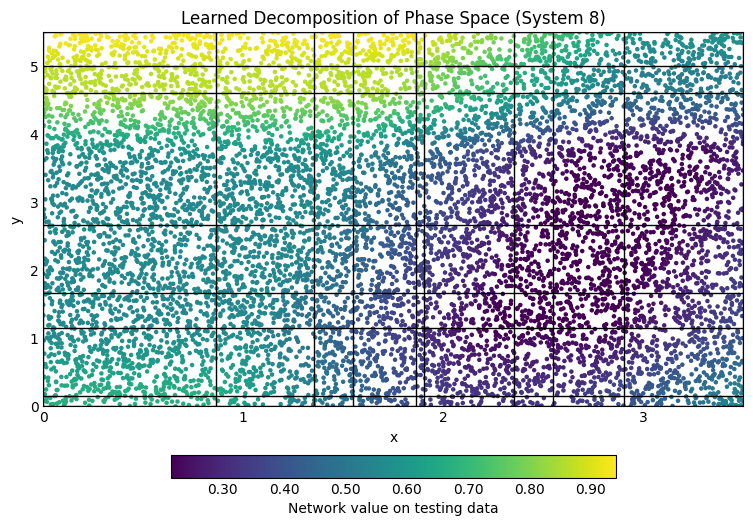

In [5]:
file_name = 'decomposition_plot'
make_decomposition_plot(system_name, N, hyperplane_list, model, file_name)

### Changing further code parameters

Further parameters such as learning rate can be changed for each system in the configuration files in the folder ```config```. 

The following sentence if false at the moment. This computation used the data available at https://github.com/begelb/attractor-id-data. To use a local copy of data, change the parameter ```using_local_data``` to ```True``` and change the paths following ```train_data_file``` and ```test_data_file``` in the configuration file to the appropriate paths.